In [1]:
%load_ext autoreload
%autoreload 2

# Imports

In [2]:
from main import prepare_data, grid_search, final_train, test
import xgboost as xgb

# Prepare the data

In [3]:
X_train, X_test, y_train, y_test = prepare_data()

# Model

In [4]:
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    enable_categorical=True
)

# Grid Search

In [5]:
_, params = grid_search(model, X_train, y_train)

Starting grid search...
Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best CV Score (Accuracy): 0.9992987515681426
Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 120, 'subsample': 0.8}


# Re-train the model on all the data

In [6]:
model = final_train(params, X_train, y_train)

Starting training...
[0]	validation_0-logloss:0.62868	validation_1-logloss:0.62900
[4]	validation_0-logloss:0.39456	validation_1-logloss:0.39576
[8]	validation_0-logloss:0.26746	validation_1-logloss:0.26936
[12]	validation_0-logloss:0.18972	validation_1-logloss:0.19207
[16]	validation_0-logloss:0.14000	validation_1-logloss:0.14258
[20]	validation_0-logloss:0.10711	validation_1-logloss:0.10967
[24]	validation_0-logloss:0.08280	validation_1-logloss:0.08531
[28]	validation_0-logloss:0.06568	validation_1-logloss:0.06806
[32]	validation_0-logloss:0.05366	validation_1-logloss:0.05596
[36]	validation_0-logloss:0.04353	validation_1-logloss:0.04579
[40]	validation_0-logloss:0.03623	validation_1-logloss:0.03847
[44]	validation_0-logloss:0.03037	validation_1-logloss:0.03254
[48]	validation_0-logloss:0.02577	validation_1-logloss:0.02793
[52]	validation_0-logloss:0.02255	validation_1-logloss:0.02468
[56]	validation_0-logloss:0.01981	validation_1-logloss:0.02191
[60]	validation_0-logloss:0.01771	val

# Test the model

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       1.00      1.00      1.00     56863

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Precision: 0.9988
Recall: 0.9999
F1-Score: 0.9993


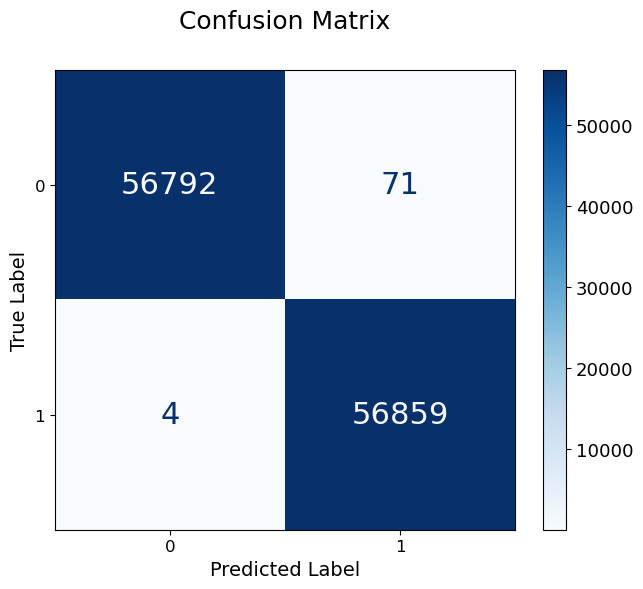

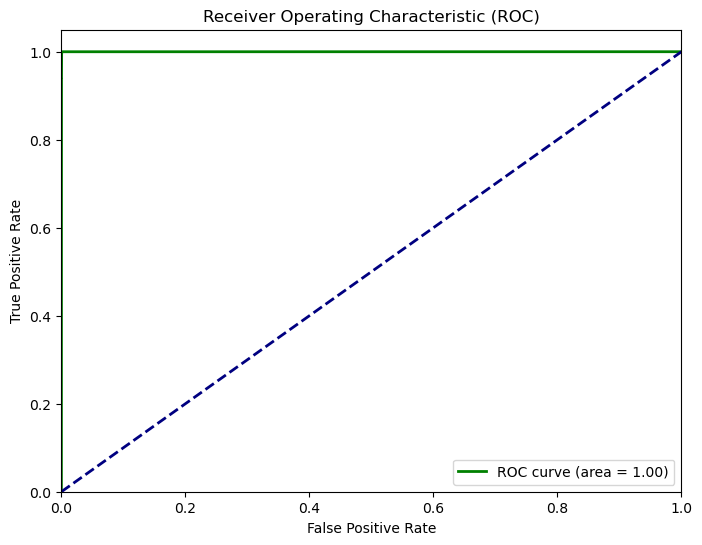

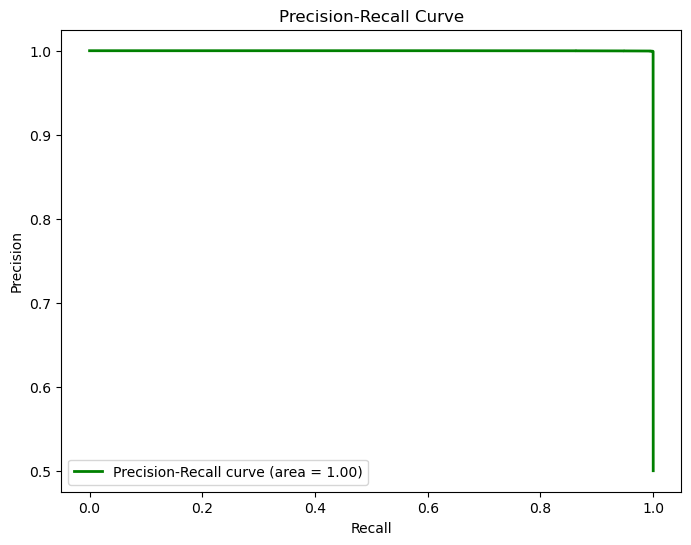

In [13]:
test(model, X_test, y_test)

# Save the model

In [8]:
model.save_model('models/best_model.model')
print("XGBoost model saved successfully.")

XGBoost model saved successfully.
